In [94]:
import pysam
import os.path
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

# Run LFMM 
see R code:

see LEA_analysis.R and LEA_analysis.dom.R for details

# Load LFMM results

In [159]:
lfmm = pd.read_csv(os.path.join('results','batch_4','LFMM','lfmm_results.dom.txt'), sep = '\t')
lfmm = lfmm.rename(columns={'locnum': 'LFMM_ID'})
lfmm.head()

,LFMM_ID,cpvals,zscore
0,1,0.514097,-0.547059
1,2,0.760482,-0.255597
2,3,0.395632,-0.712213
3,4,0.948275,-0.054392
4,5,0.487917,-0.581565


#### Load fake map file - relates domID and LFMM_ID

In [160]:
complete_dom_map = pd.read_csv(os.path.join('results','batch_4','EIGENSOFT','complete.dom.map'),sep = '\t', header = None)
complete_dom_map.columns = ['junkLG', 'domID', 'junk1', 'junk2']
complete_dom_map['stacks_CatID'] = [np.int(x.split('_')[0]) for x in complete_dom_map['domID']]
complete_dom_map['LFMM_ID'] = range(1, len(complete_dom_map)+1)
complete_dom_map.head()

,junkLG,domID,junk1,junk2,stacks_CatID,LFMM_ID
0,1,2_A,1,1,2,1
1,1,2_G,1,1,2,2
2,1,7_GG,1,1,7,3
3,1,7_TA,1,1,7,4
4,1,7_TG,1,1,7,5


In [53]:
lfmm_results = pd.merge(lfmm, complete_dom_map)
lfmm_results = lfmm_results[['LFMM_ID','cpvals','zscore','domID','stacks_CatID']]
lfmm_results.head()

,LFMM_ID,cpvals,zscore,domID,stacks_CatID
0,1,0.514097,-0.547059,2_A,2
1,2,0.760482,-0.255597,2_G,2
2,3,0.395632,-0.712213,7_GG,7
3,4,0.948275,-0.054392,7_TA,7
4,5,0.487917,-0.581565,7_TG,7


#### Load linkage map

In [158]:
linkage_map = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/final/PS_chum_map_2015.txt',sep = '\t')
linkage_map.tail(500)
linkage_map[linkage_map['contig']== 'c48610']

,contig,resolved_locus,stacks_CatID,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM
2493,c48610,48610_A,32975,32975_46,5656,5,12.86,2,124.60
2494,c48610,48610_A,32975,32975_75,5656,5,12.86,2,124.60
2495,c48610,48610_A,32975,32975_82,5656,5,12.86,2,124.60
2496,c48610,48610_A,32975,32975_92,5656,5,12.86,2,124.60
2497,c48610,48610_B,32975,32975_46,5657,5,12.86,2,124.60
2498,c48610,48610_B,32975,32975_75,5657,5,12.86,2,124.60
2499,c48610,48610_B,32975,32975_82,5657,5,12.86,2,124.60
2500,c48610,48610_B,32975,32975_92,5657,5,12.86,2,124.60
2501,c48610,48610_D,32975,32975_46,5658,5,17.10,2,120.36
2502,c48610,48610_D,32975,32975_75,5658,5,17.10,2,120.36


#### Look at the input to lepmap

this locus was not combined across families

## Scored separately across families

In [231]:
lepmap_file = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap', sep = '\t')
lepmap_file[['#family','name'] + linkage_map[linkage_map['contig']== 'c48610']['resolved_locus'].drop_duplicates().tolist()].head()

,#family,name,48610_A,48610_B,48610_D,48610_E
0,fam_08,fam_08_Dam,1 1,1 1,1 1,1 1
1,fam_08,fam_08_Sire,1 2,1 2,1 2,1 2
2,fam_08,CMUW10X08H_0002,0 0,0 0,1 1,1 1
3,fam_08,CMUW10X08H_0003,0 0,0 0,0 0,0 0
4,fam_08,CMUW10X08H_0005,0 0,0 0,1 2,1 2


In [230]:
lep_subset = lepmap_file[['#family','name'] + linkage_map[linkage_map['contig']== 'c48610']['resolved_locus'].drop_duplicates().tolist()]
lep_subset.replace('0 0', np.nan ).groupby('#family').count()

,name,48610_A,48610_B,48610_D,48610_E
#family,,,,,
fam_01,36,2,2,2,2
fam_08,177,2,2,139,139
fam_09,33,29,29,2,2


In [55]:
lfmm_results_with_map = pd.merge(lfmm_results, linkage_map, how = 'outer').drop_duplicates(subset = 'domID')
print lfmm_results_with_map.shape
lfmm_results_with_map.head()

(35580, 13)


,LFMM_ID,cpvals,zscore,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM
0,1,0.514097,-0.547059,2_A,2,c10003,10003_A,2_78,2,19,58.39,5,58.39
1,2,0.760482,-0.255597,2_G,2,c10003,10003_A,2_78,2,19,58.39,5,58.39
2,3,0.395632,-0.712213,7_GG,7,c1000,1000_C,7_74,3,11,53.54,32,53.54
4,4,0.948275,-0.054392,7_TA,7,c1000,1000_C,7_74,3,11,53.54,32,53.54
6,5,0.487917,-0.581565,7_TG,7,c1000,1000_C,7_74,3,11,53.54,32,53.54


## determine candidates

In [73]:
import statsmodels.sandbox.stats.multicomp
reject_null, fdr_pval, alphacSidak, alphacBonf = statsmodels.sandbox.stats.multicomp.multipletests(lfmm_results_with_map['cpvals'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
lfmm_results_with_map['fdr_pval'] = fdr_pval
lfmm_results_with_map['reject_null'] = reject_null
lfmm_results_with_map['mlog10(fdr_pval)_LFMM'] = -np.log10(lfmm_results_with_map['fdr_pval'])
print lfmm_results_with_map['reject_null'].sum()
lfmm_results_with_map.head()

748


,LFMM_ID,cpvals,zscore,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,reject_null,fdr_pval,mlog10(fdr_pval)_LFMM
0,1,0.514097,-0.547059,2_A,2,c10003,10003_A,2_78,2,19,58.39,5,58.39,False,0.999973,0.000012
1,2,0.760482,-0.255597,2_G,2,c10003,10003_A,2_78,2,19,58.39,5,58.39,False,0.999973,0.000012
2,3,0.395632,-0.712213,7_GG,7,c1000,1000_C,7_74,3,11,53.54,32,53.54,False,0.979034,0.009202
4,4,0.948275,-0.054392,7_TA,7,c1000,1000_C,7_74,3,11,53.54,32,53.54,False,0.999973,0.000012
6,5,0.487917,-0.581565,7_TG,7,c1000,1000_C,7_74,3,11,53.54,32,53.54,False,0.996818,0.001384


In [70]:
lfmm_results_with_map = lfmm_results_with_map.dropna(subset=['zscore'])

## Summary plots

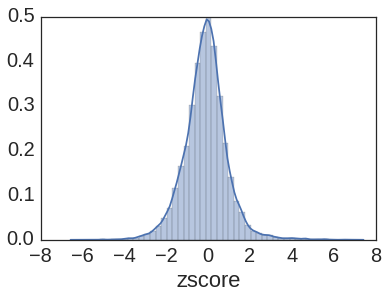

In [71]:
sns.distplot(lfmm_results_with_map['zscore'])
plt.show()

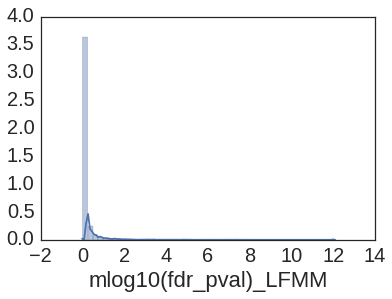

In [74]:
sns.distplot(lfmm_results_with_map['mlog10(fdr_pval)_LFMM'])
plt.show()

## genome scan

In [232]:
mapped_lfmm = lfmm_results_with_map[lfmm_results_with_map['paper1_LG'].notnull()]

In [233]:
cumpos = pd.DataFrame(mapped_lfmm.groupby('paper1_LG')['cM'].max().cumsum())
cumpos.index = cumpos.index+1
cumpos.set_value(1, 'cM', 0)
cumpos = cumpos.sort_index()
cumpos['cM_pad'] = cumpos['cM'] + np.arange(0,750, 20)
cumpos = cumpos[['cM_pad']]
cumpos.head()

,cM_pad
paper1_LG,
1,0.00
2,126.08
3,279.96
4,359.74
5,499.22


In [234]:
genome_stats = pd.merge(mapped_lfmm, cumpos, right_index=True, left_on = 'paper1_LG')
genome_stats['cM_padded'] = genome_stats['cM'] + genome_stats['cM_pad']

genome_stats.tail()

,LFMM_ID,cpvals,zscore,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,reject_null,fdr_pval,mlog10(fdr_pval)_LFMM,cM_pad,cM_padded
57778,35121,0.564129,0.483546,67801_AT,67801,c953,953,67801_69,11987,30,0.42,15,0.42,False,0.999973,0.000012,1452.48,1452.90
57972,35256,0.844697,0.164242,68268_A,68268,c9758,9758,68268_6,12031,30,19.15,15,19.15,False,0.999973,0.000012,1452.48,1471.63
57973,35257,0.699037,-0.324159,68268_T,68268,c9758,9758,68268_6,12031,30,19.15,15,19.15,False,0.999973,0.000012,1452.48,1471.63
57996,35270,0.081779,-1.459270,68328_C,68328,c9788,9788,68328_61,12041,30,2.94,15,2.94,False,0.604314,0.218738,1452.48,1455.42
57997,35271,0.099128,-1.382670,68328_T,68328,c9788,9788,68328_61,12041,30,2.94,15,2.94,False,0.650836,0.186528,1452.48,1455.42


## flag duplicates

In [235]:
genome_stats['paralog'] = ['_' in xx for xx in genome_stats['resolved_locus']]

In [236]:
genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)

,LFMM_ID,cpvals,zscore,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,reject_null,fdr_pval,mlog10(fdr_pval)_LFMM,cM_pad,cM_padded,paralog
27767,17394,1.322859e-09,-5.084810,32975_TCAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,True,0.000001,5.999390e+00,126.08,250.68,True
27751,17393,1.882237e-09,-5.037070,32975_CTTA,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,True,0.000001,5.881702e+00,126.08,250.68,True
27799,17396,2.665995e-09,-4.989520,32975_CCTC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,True,0.000002,5.755341e+00,126.08,250.68,True
27719,17391,3.965623e-09,-4.934750,32975_TTAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,True,0.000002,5.606370e+00,126.08,250.68,True
27815,17397,8.389086e-09,-4.829800,32975_CCAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,True,0.000005,5.288520e+00,126.08,250.68,True
27783,17395,1.257493e-07,-4.431110,32975_CTTC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,True,0.000044,4.357901e+00,126.08,250.68,True
27735,17392,2.890013e-07,-4.301610,32975_TCAA,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,True,0.000087,4.060839e+00,126.08,250.68,True
27703,17390,3.670629e-07,-4.263720,32975_CTAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,True,0.000104,3.984436e+00,126.08,250.68,True
33694,20647,1.401971e-06,-4.045250,38015_GCTC,38015,c54555,54555_A,38015_32,6858,2,102.30,10,102.30,True,0.000318,3.497967e+00,899.81,1002.11,True
37951,22986,1.789623e-06,4.004260,41176_GGT,41176,c58279,58279_A,41176_32,7718,11,103.16,32,103.16,True,0.000384,3.416153e+00,3040.18,3143.34,True


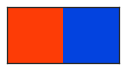

In [237]:
colors = ["red orange", "blue"]
sns.palplot(sns.xkcd_palette(colors))

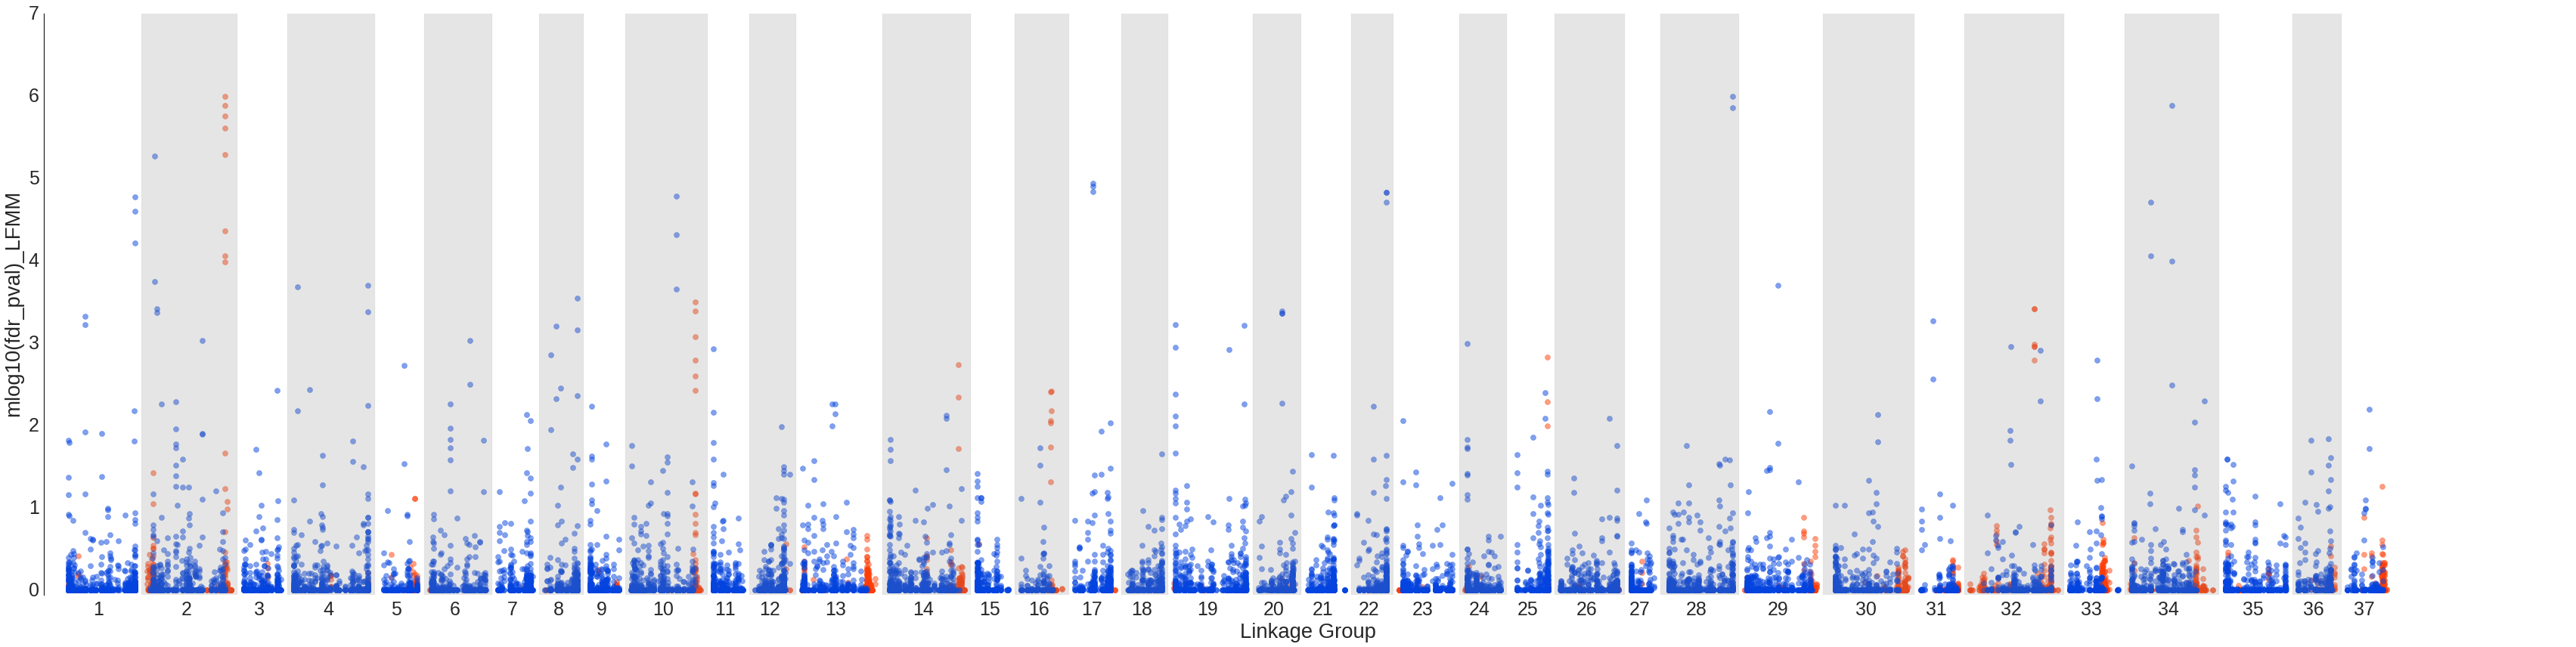

In [238]:
sns.set(font_scale=2.5, style = "white")
stat = 'mlog10(fdr_pval)_LFMM'
kws = dict(s=50, linewidth=.5, alpha = .5)


g = sns.FacetGrid(data = genome_stats, sharex=False, hue_kws=dict(marker=["o", 'o']),
           size = 12, aspect = 4, palette=sns.xkcd_palette(colors), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', 'mlog10(fdr_pval)_LFMM', **kws))

g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group', stat)
sns.despine(left=False, bottom = True)

currentLG = 1
for idx, LG_box_left in enumerate(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values[:36]):
    box_width = np.diff(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values)[idx]
    if currentLG%2 == 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 20, alpha = .2, color = 'gray'))
    currentLG+=1

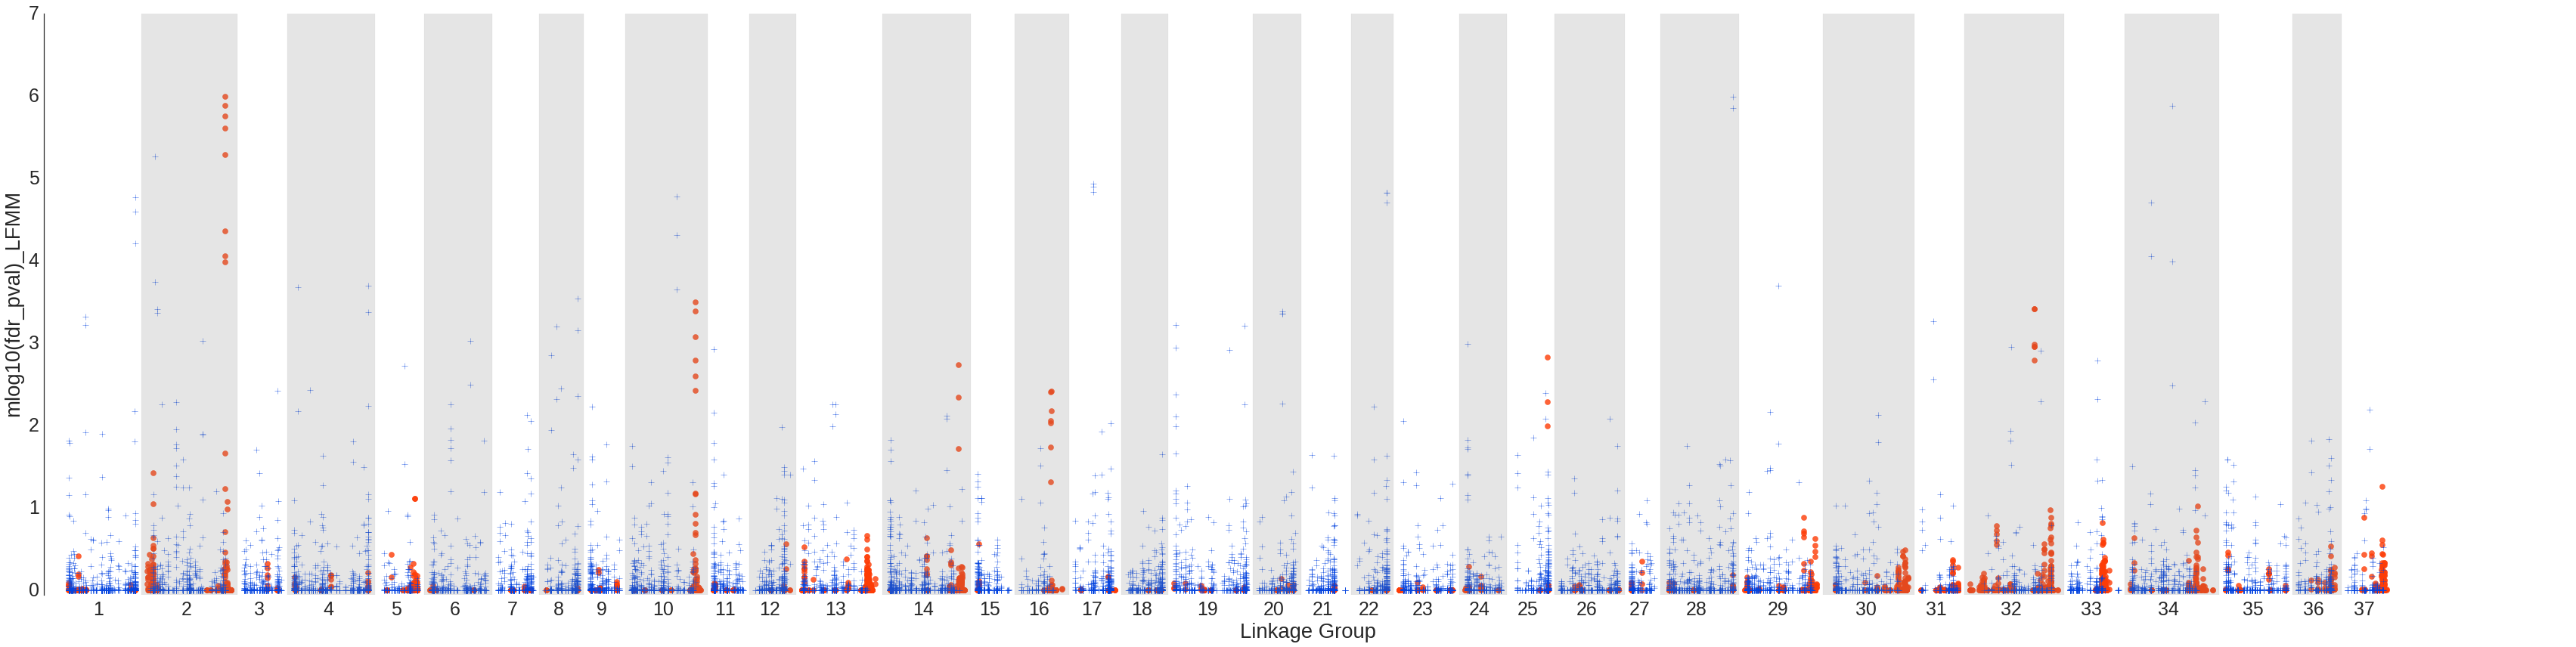

In [239]:
sns.set(font_scale=2.5, style = "white")
stat = 'mlog10(fdr_pval)_LFMM'
kws = dict(s=50, linewidth=.5, alpha = .8)


g = sns.FacetGrid(data = genome_stats, sharex=False, hue_kws=dict(marker=["o", '+']),
           size = 12, aspect = 4, palette=sns.xkcd_palette(colors), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', 'mlog10(fdr_pval)_LFMM', **kws))

g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group', stat)
sns.despine(left=False, bottom = True)

currentLG = 1
for idx, LG_box_left in enumerate(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values[:36]):
    box_width = np.diff(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values)[idx]
    if currentLG%2 == 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 20, alpha = .2, color = 'gray'))
    currentLG+=1

In [240]:
### Look at the raw (dominance) genotypes

In [241]:
## load the lfmm file and env file

In [242]:
lfmm_dom_in = pd.read_csv(os.path.join('results','batch_4','LFMM','complete.dom.lfmm'),sep = ' ', header = None)
lfmm_dom_in.columns = [x+1 for x in lfmm_dom_in.columns]
lfmm_dom_in.head()

,1,2,3,4,5,6,7,8,9,10,...,35570,35571,35572,35573,35574,35575,35576,35577,35578,35579
0,1,1,1,1,1,1,1,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,0,1,1,1,1,1,1,0,0,1,...,9,9,0,1,0,1,0,1,0,0
2,0,1,1,1,1,1,1,1,0,1,...,1,0,0,1,0,1,9,9,9,9
3,0,1,1,1,1,1,1,0,0,1,...,1,0,0,1,9,9,0,0,1,0
4,0,1,0,1,0,1,1,1,0,1,...,1,0,0,1,0,1,9,9,9,9


In [247]:
lfmm_assess = lfmm_dom_in.replace('9', np.nan)

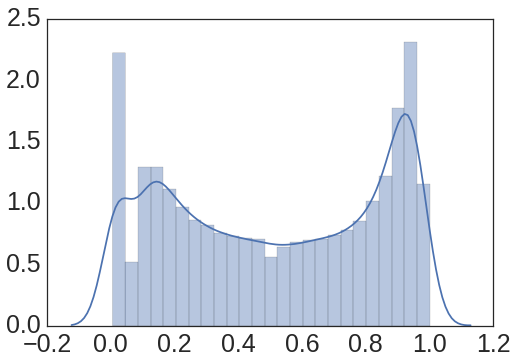

In [253]:
sns.distplot(lfmm_assess.sum(axis = 0)/174)

In [ ]:
##

In [264]:
(lfmm_assess.sum(axis = 0)/174 > .05) & (lfmm_assess.sum(axis = 0)/174 < .95)

1         True
2         True
3         True
4        False
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13       False
14        True
15        True
16        True
17       False
18        True
19       False
20        True
21        True
22        True
23       False
24        True
25        True
26        True
27        True
28        True
29        True
30        True
         ...  
35550     True
35551     True
35552     True
35553     True
35554     True
35555     True
35556     True
35557     True
35558     True
35559     True
35560     True
35561     True
35562     True
35563     True
35564     True
35565     True
35566     True
35567     True
35568     True
35569     True
35570     True
35571     True
35572     True
35573     True
35574     True
35575     True
35576     True
35577     True
35578     True
35579     True
dtype: bool

In [243]:
genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)[:8]

,LFMM_ID,cpvals,zscore,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,reject_null,fdr_pval,mlog10(fdr_pval)_LFMM,cM_pad,cM_padded,paralog
27767,17394,1.322859e-09,-5.08481,32975_TCAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.6,True,0.000001,5.999390,126.08,250.68,True
27751,17393,1.882237e-09,-5.03707,32975_CTTA,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.6,True,0.000001,5.881702,126.08,250.68,True
27799,17396,2.665995e-09,-4.98952,32975_CCTC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.6,True,0.000002,5.755341,126.08,250.68,True
27719,17391,3.965623e-09,-4.93475,32975_TTAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.6,True,0.000002,5.606370,126.08,250.68,True
27815,17397,8.389086e-09,-4.82980,32975_CCAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.6,True,0.000005,5.288520,126.08,250.68,True
27783,17395,1.257493e-07,-4.43111,32975_CTTC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.6,True,0.000044,4.357901,126.08,250.68,True
27735,17392,2.890013e-07,-4.30161,32975_TCAA,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.6,True,0.000087,4.060839,126.08,250.68,True
27703,17390,3.670629e-07,-4.26372,32975_CTAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.6,True,0.000104,3.984436,126.08,250.68,True


In [244]:
lfmm_subset = lfmm_dom_in[genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)[:8]['LFMM_ID'].tolist()].copy()
lfmm_subset['env'] = env['env']
lfmm_subset = lfmm_subset.replace(9, np.nan).dropna()
lfmm_subset.tail()

,17394,17393,17396,17391,17397,17395,17392,17390,env
167,0,0,0,0,1,1,1,1,2
169,0,0,0,0,1,0,1,1,2
170,0,0,0,0,0,1,0,1,2
171,0,0,0,0,1,1,1,1,2
172,0,0,0,0,0,1,1,1,2


In [245]:
lfmm_subset.groupby('env').mean()

,17394,17393,17396,17391,17397,17395,17392,17390
env,,,,,,,,
1,0.200000,0.000000,0.000000,0.000000,0.600000,0.571429,0.800000,0.771429
2,0.153846,0.010989,0.010989,0.000000,0.571429,0.681319,0.813187,0.769231
3,0.058824,0.000000,0.000000,0.058824,0.588235,0.588235,0.941176,0.823529


In [195]:
genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)[:8]['LFMM_ID'].tolist()

[17394.0, 17393.0, 17396.0, 17391.0, 17397.0, 17395.0, 17392.0, 17390.0]

In [196]:
lfmm_dom_in.T.head()

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
1,1,0,0,0,0,9,9,1,0,0,...,1,0,0,0,1,0,0,1,0,0
2,1,1,1,1,1,9,9,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,0,0,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
env = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/LFMM/basic.env', header = None)
env.columns = ['env']
env.head()

,env
0,1
1,1
2,1
3,1
4,1


In [183]:
genome_stats.head()

,LFMM_ID,cpvals,zscore,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,reject_null,fdr_pval,mlog10(fdr_pval)_LFMM,cM_pad,cM_padded,paralog
0,1,0.514097,-0.547059,2_A,2,c10003,10003_A,2_78,2,19,58.39,5,58.39,False,0.999973,0.000012,499.22,557.61,True
1,2,0.760482,-0.255597,2_G,2,c10003,10003_A,2_78,2,19,58.39,5,58.39,False,0.999973,0.000012,499.22,557.61,True
200,118,0.963849,-0.038001,133_TCT,133,c10163,10163_A,133_15,43,19,42.14,5,42.14,False,0.999973,0.000012,499.22,541.36,True
203,119,0.767656,0.247711,133_CTC,133,c10163,10163_A,133_15,43,19,42.14,5,42.14,False,0.999973,0.000012,499.22,541.36,True
206,120,0.913236,-0.091355,133_CCT,133,c10163,10163_A,133_15,43,19,42.14,5,42.14,False,0.999973,0.000012,499.22,541.36,True


In [ ]:
assert False

In [14]:
pop_fst = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/non_paralogs.fst', sep= '\t')
pop_fst.rename(columns = {'SNP':'stacks_SNP'}, inplace=True)
pop_fst.head()

,CHR,stacks_SNP,POS,NMISS,FST
0,0,1013_6,6,168,0.015589
1,0,2062_6,6,171,-0.002161
2,0,2574_6,6,169,0.017541
3,0,2741_6,6,166,-0.005708
4,0,4096_6,6,169,0.010227


In [15]:
lfmm_map = pd.merge(lfmm_map, pop_fst, left_on='stacksID', right_on='stacks_SNP')

In [16]:
linkage_map = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/final/PS_chum_map_2015.txt',sep = '\t')
linkage_map.head()

,contig,resolved_locus,stacks_CatID,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM
0,c4311,4311,28282,28282_88,4584,1,0,1,0
1,c4311,4311,28282,28282_91,4584,1,0,1,0
2,c56875,56875,39970,39970_17,7377,1,0,1,0
3,c56875,56875,39970,39970_33,7377,1,0,1,0
4,c56875,56875,39970,39970_49,7377,1,0,1,0


In [17]:
mapped_lfmm = pd.merge(linkage_map, lfmm_map, left_on='stacks_SNP', right_on='stacksID', how = 'right')
mapped_lfmm.shape

(12399, 23)

In [18]:
mapped_lfmm = mapped_lfmm.sort(columns=['paper1_LG', 'cM'])
mapped_lfmm['manhattan_order'] = range(1, len(mapped_lfmm)+1)
mapped_lfmm.head()

,contig,resolved_locus,stacks_CatID,stacks_SNP_x,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,locnum,...,plinkLG,stacksID,junk1,junk2,CHR,stacks_SNP_y,POS,NMISS,FST,manhattan_order
0,c4311,4311,28282,28282_88,4584,1,0,1,0,6440,...,1,28282_88,0,88,1,28282_88,88,156,0.013742,1
1,c56875,56875,39970,39970_60,7377,1,0,1,0,6348,...,1,39970_60,0,60,1,39970_60,60,152,0.016345,2
2,c54045,54045,37579,37579_17,6722,1,0,1,0,6197,...,1,37579_17,0,17,1,37579_17,17,164,0.028103,3
3,c2167,2167,10293,10293_9,1923,1,0,1,0,6162,...,1,10293_9,0,9,1,10293_9,9,162,0.014312,4
4,c69918,69918,50820,50820_7,10017,1,0,1,0,6154,...,1,50820_7,0,7,1,50820_7,7,169,0.015249,5


In [21]:
mapped_lfmm.to_csv(os.path.join('results','batch_4','LFMM', 'mapped_lfmm.txt'), index = False, sep = '\t')

# Plots

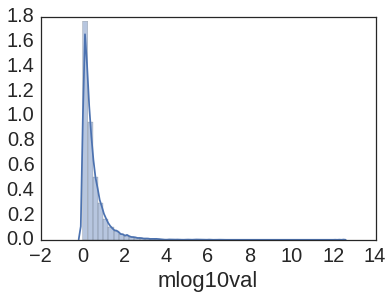

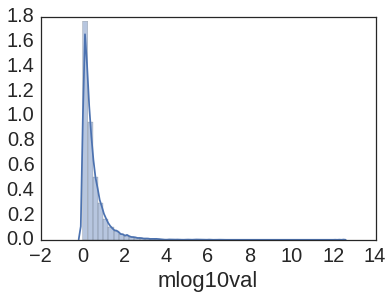

In [28]:
sns.distplot(lfmm['mlog10val'])
plt.show()
sns.distplot(mapped_lfmm['mlog10val'])
plt.show()

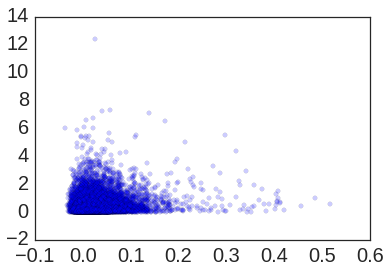

In [34]:
plt.scatter(x =mapped_lfmm['FST'] , y =mapped_lfmm['mlog10val'], alpha = .2)

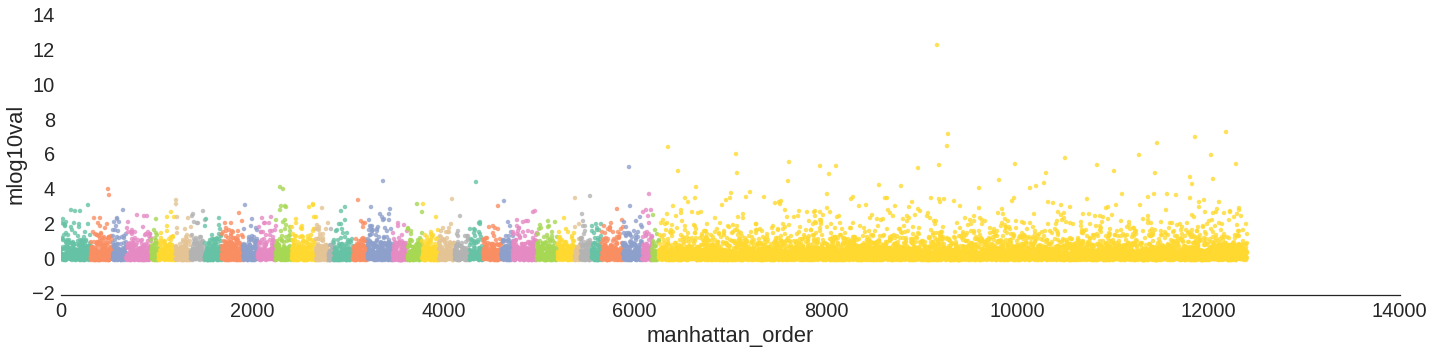

In [29]:
g = sns.lmplot(data = mapped_lfmm, x = 'manhattan_order', y = 'mlog10val', fit_reg=False, hue = 'plinkLG', sharex=False,
           legend= False, size = 5, aspect = 4, truncate = True,           palette="Set2")
g.set(xlim=0)
sns.despine(left=True)

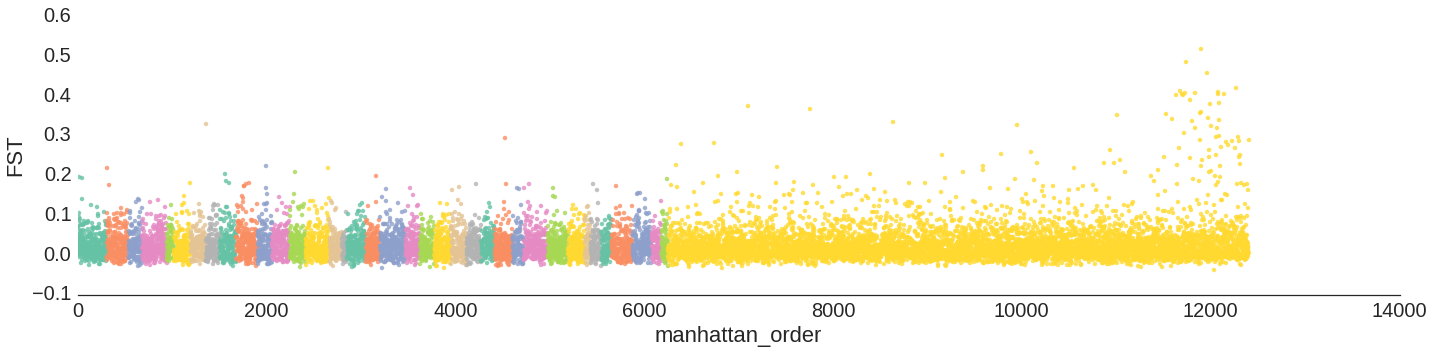

In [35]:
g = sns.lmplot(data = mapped_lfmm, x = 'manhattan_order', y = 'FST', fit_reg=False, hue = 'plinkLG', sharex=False,
           legend= False, size = 5, aspect = 4, truncate = True,           palette="Set2")
g.set(xlim=0)
sns.despine(left=True)

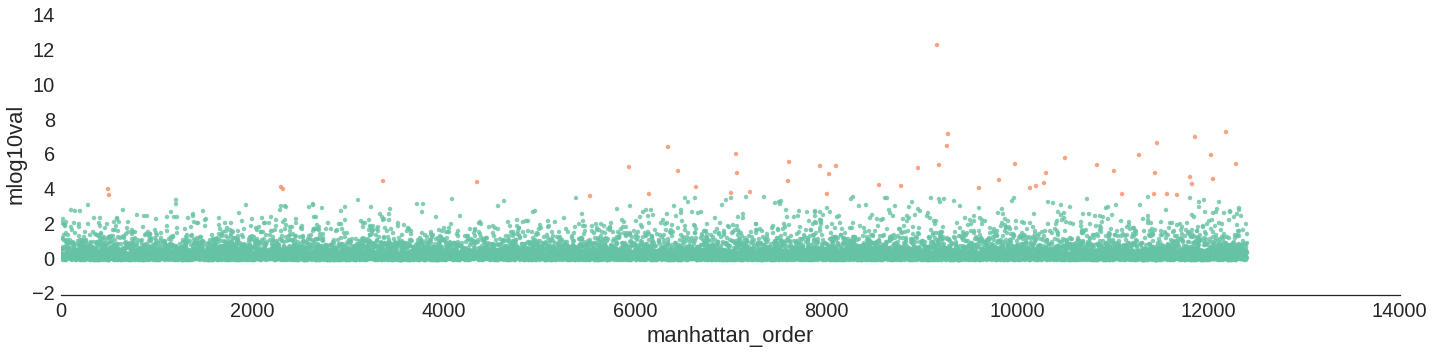

In [30]:
g = sns.lmplot(data = mapped_lfmm, x = 'manhattan_order', y = 'mlog10val', fit_reg=False, hue = 'reject_null', sharex=False,
           legend= False, size = 5, aspect = 4, truncate = True,           palette="Set2")
g.set(xlim=-1)
sns.despine(left=True)

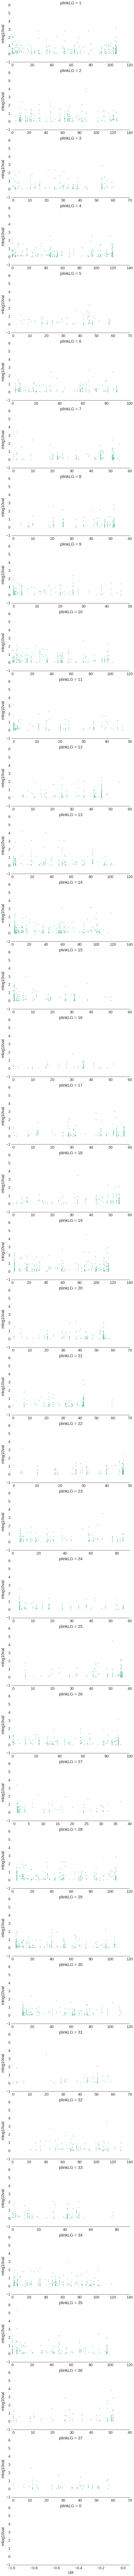

In [31]:
#figsize(10,10)
g = sns.lmplot(data = mapped_lfmm, x = 'cM', y = 'mlog10val', fit_reg=False, row = 'plinkLG', hue = 'reject_null', sharex=False,
           legend= False, size = 5, aspect = 2, 
           palette="Set2")
g.set(xlim=-1)
sns.despine(left=True)

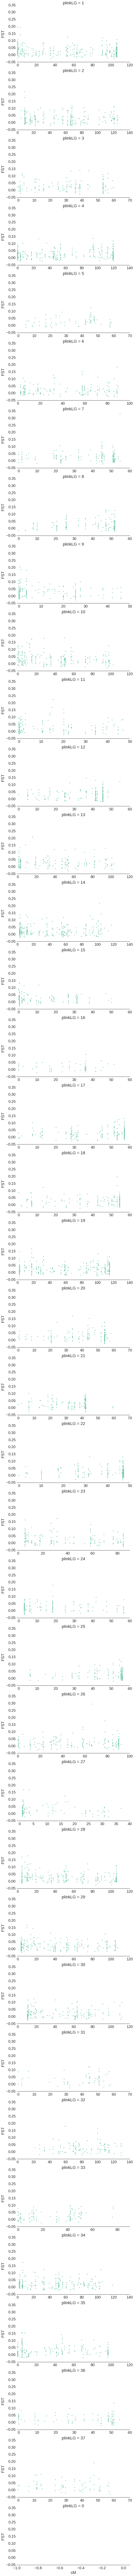

In [36]:
#figsize(10,10)
g = sns.lmplot(data = mapped_lfmm, x = 'cM', y = 'FST', fit_reg=False, row = 'plinkLG', hue = 'reject_null', sharex=False,
           legend= False, size = 5, aspect = 2, 
           palette="Set2")
g.set(xlim=-1)
sns.despine(left=True)